In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import numpy as np
import pandas as pd
import sklearn.manifold as manifold
import sklearn.cluster as cluster
import sklearn.preprocessing as preprocessing
import hdbscan
import seaborn as sns
import os
import itertools
from operator import itemgetter
from collections import defaultdict


In [124]:
data_folder = '../data'
filenames = os.listdir(data_folder)
filenames = list(filter(lambda x: '.ipynb_checkpoints' not in x and 'rates.csv' not in x, filenames))
filenames = filenames[:]

In [126]:
df = None
relevant_cols = ['State', '# Killed']
for filename in filenames:
    print(f'Processing {filename}')
    file_path = f'{data_folder}/{filename}'
    #df1 = pd.read_csv(open(file_path, 'rU'),  encoding='utf-8', engine='c')
    df1 = pd.read_csv(file_path)
    df1['# Killed'] = df1['# Killed'].astype(dtype='float64')
    #df1['# Injured'] = df1['# Injured'].astype(dtype='float64')
    df1 = df1[relevant_cols]
    df1 = df1.rename(index=str, columns={'# Killed': f'{filename} # Killed', 
                                  '# Injured': f'{filename} # Injured'})
    df1 = df1.groupby('State').sum()
    if df is not None:
        df = df.join(df1)
    else:
        df = df1
df = df.fillna(value=0)

Processing accidental_deaths.csv
Processing accidental_deaths_children.csv
Processing accidental_deaths_teens.csv
Processing accidental_injuries.csv
Processing accidental_injuries_children.csv
Processing accidental_injuries_teens.csv
Processing children_injured.csv
Processing children_killed.csv
Processing mass_shootings_2014.csv
Processing mass_shootings_2015.csv
Processing mass_shootings_2016.csv
Processing mass_shootings_all.csv
Processing officer_involved_shootings.csv
Processing teens_injured.csv
Processing teens_killed.csv


In [127]:
df.head()

,accidental_deaths.csv # Killed,accidental_deaths_children.csv # Killed,accidental_deaths_teens.csv # Killed,accidental_injuries.csv # Killed,accidental_injuries_children.csv # Killed,accidental_injuries_teens.csv # Killed,children_injured.csv # Killed,children_killed.csv # Killed,mass_shootings_2014.csv # Killed,mass_shootings_2015.csv # Killed,mass_shootings_2016.csv # Killed,mass_shootings_all.csv # Killed,officer_involved_shootings.csv # Killed,teens_injured.csv # Killed,teens_killed.csv # Killed
State,,,,,,,,,,,,,,,
Alabama,14.0,9.0,6.0,0.0,1.0,1.0,3.0,15.0,1.0,4.0,15.0,18.0,2.0,0.0,11.0
Alaska,5.0,5.0,1.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
Arizona,8.0,4.0,4.0,0.0,0.0,0.0,2.0,21.0,1.0,15.0,12.0,14.0,1.0,0.0,15.0
Arkansas,13.0,5.0,4.0,0.0,0.0,0.0,1.0,7.0,5.0,2.0,2.0,3.0,1.0,1.0,4.0
California,17.0,4.0,9.0,0.0,1.0,1.0,3.0,35.0,45.0,38.0,37.0,59.0,2.0,5.0,41.0


In [128]:
values = df.values
state = df.index
features = values[:,0:]
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)

In [129]:
manifold_method = manifold.SpectralEmbedding(n_components=2)
projections = manifold_method.fit_transform(features)

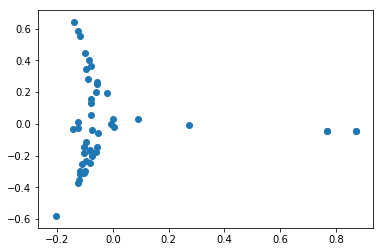

In [130]:
plt.scatter(projections[:,0], projections[:,1])

Text(0.5,1,'Elbow curve')

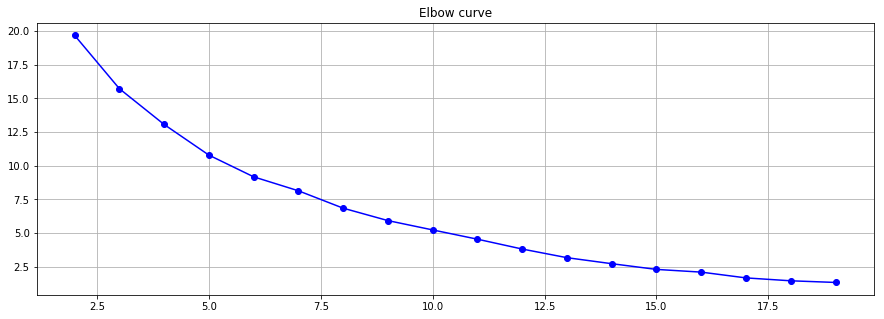

In [131]:
X = features
distorsions = []
for k in range(2, 20):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions, 'bo-')
plt.grid(True)
plt.title('Elbow curve')

In [132]:
k = 5
kmeans = cluster.KMeans(n_clusters=k)

In [133]:
clusters = kmeans.fit_predict(features)

In [134]:
assignments = list(zip(state, clusters))

In [135]:
groupings = defaultdict(list)
state_g = dict()
for s, c in assignments:
    groupings[c].append(s)
    state_g[s] = c

In [136]:
print(groupings)

defaultdict(<class 'list'>, {1: ['Alabama', 'Georgia', 'Michigan', 'South Carolina', 'Tennessee'], 3: ['Alaska', 'Arkansas', 'Colorado', 'Connecticut', 'Hawaii', 'Idaho', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Minnesota', 'Mississippi', 'Montana', 'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'North Dakota', 'Oklahoma', 'Oregon', 'South Dakota', 'Utah', 'Vermont', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], 0: ['Arizona', 'Indiana', 'Louisiana', 'Missouri', 'New York', 'North Carolina', 'Ohio', 'Pennsylvania', 'Virginia'], 4: ['California', 'Florida', 'Illinois'], 2: ['Texas']})


In [137]:
groupings[state_g['Wyoming']]

['Alaska',
 'Arkansas',
 'Colorado',
 'Connecticut',
 'Hawaii',
 'Idaho',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Minnesota',
 'Mississippi',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Jersey',
 'New Mexico',
 'North Dakota',
 'Oklahoma',
 'Oregon',
 'South Dakota',
 'Utah',
 'Vermont',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [138]:
rates_filepath = '../data/rates.csv'
rates_df = pd.read_csv(rates_filepath)
rates_df.index = rates_df['State']
rates_df = rates_df[['FA_Ownership_Rate']]

In [139]:
rates_df.loc['Alaska'].values[0]

0.57799999999999996

In [140]:
rates = {}
for key, states in groupings.items():
    rs = []
    for s in states:
        r = rates_df.loc[s].values[0]
        rs.append(r)
    rates[key] = rs

In [146]:
p_vals = np.ones(shape=(k, k))
from scipy.stats import ttest_ind
for i in range(k):
    for j in range(k):
        if i != j:
            x = rates[i]
            y = rates[j]
            if len(x) == 1:
                x = x * 2
            if len(y) == 1:
                y = y * 2
            s, p = ttest_ind(x, y , equal_var=False, nan_policy='raise')
            p_vals[i][j] = p
        

In [147]:
p_vals

array([[ 1.        ,  0.04033499,  0.81830716,  0.17562166,  0.08834847],
       [ 0.04033499,  1.        ,  0.03169003,  0.45038438,  0.02063315],
       [ 0.81830716,  0.03169003,  1.        ,  0.10065582,  0.10368219],
       [ 0.17562166,  0.45038438,  0.10065582,  1.        ,  0.02595352],
       [ 0.08834847,  0.02063315,  0.10368219,  0.02595352,  1.        ]])

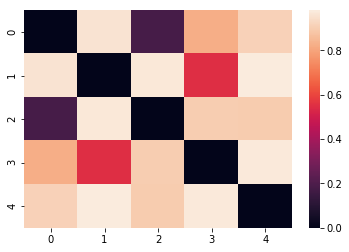

In [155]:
sns.heatmap(1 - p_vals)

In [156]:
groupings[4]

['California', 'Florida', 'Illinois']

In [158]:
df.loc[['California', 'Florida', 'Illinois']]

,accidental_deaths.csv # Killed,accidental_deaths_children.csv # Killed,accidental_deaths_teens.csv # Killed,accidental_injuries.csv # Killed,accidental_injuries_children.csv # Killed,accidental_injuries_teens.csv # Killed,children_injured.csv # Killed,children_killed.csv # Killed,mass_shootings_2014.csv # Killed,mass_shootings_2015.csv # Killed,mass_shootings_2016.csv # Killed,mass_shootings_all.csv # Killed,officer_involved_shootings.csv # Killed,teens_injured.csv # Killed,teens_killed.csv # Killed
State,,,,,,,,,,,,,,,
California,17.0,4.0,9.0,0.0,1.0,1.0,3.0,35.0,45.0,38.0,37.0,59.0,2.0,5.0,41.0
Florida,34.0,10.0,22.0,0.0,0.0,0.0,9.0,58.0,26.0,18.0,80.0,92.0,0.0,3.0,47.0
Illinois,16.0,6.0,7.0,0.0,1.0,2.0,4.0,20.0,16.0,17.0,22.0,33.0,1.0,9.0,57.0
